# MNIST Digit Classification using PCA + KNN
## Overview
This project classifies handwritten digits from the MNIST dataset using preprocessing, PCA, and KNN with hyperparameter tuning.

## 1. Import Libraries

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler

from mlxtend.plotting import plot_decision_regions

import numpy as np

import time
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load Dataset

In [2]:
train = pd.read_csv("Data/mnist_train.csv")
test = pd.read_csv("Data/mnist_test.csv")

print(train.shape, test.shape)
train.head()


(60000, 785) (10000, 785)


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 3. Train-Test Split and Prepare Data

In [3]:
X_train = train.drop("label", axis=1).values
y_train = train["label"].values

X_test = test.drop("label", axis=1).values
y_test = test["label"].values


## 4. Visualize a Sample Image

Number (Label): 3


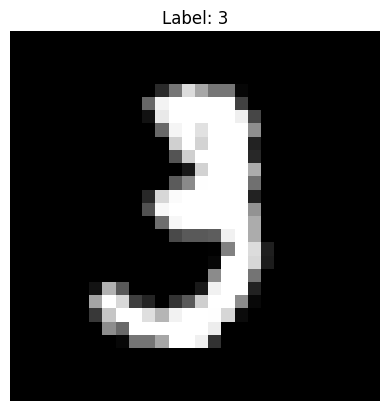

In [4]:
# pick an index
index = 10   # try 0, 10, 100, 999 etc.

print("Number (Label):", y_train[index])

plt.imshow(X_train[index].reshape(28, 28), cmap='gray')
plt.title(f"Label: {y_train[index]}")
plt.axis("off")
plt.show()


## 5. Preprocessing (Scaling + PCA 50 components)

In [5]:
scaler = MinMaxScaler()
pca = PCA(n_components=50)

x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

x_train = pca.fit_transform(x_train_scaled)
x_test = pca.transform(x_test_scaled)

## 6. PCA 2D Visualization with KNN 

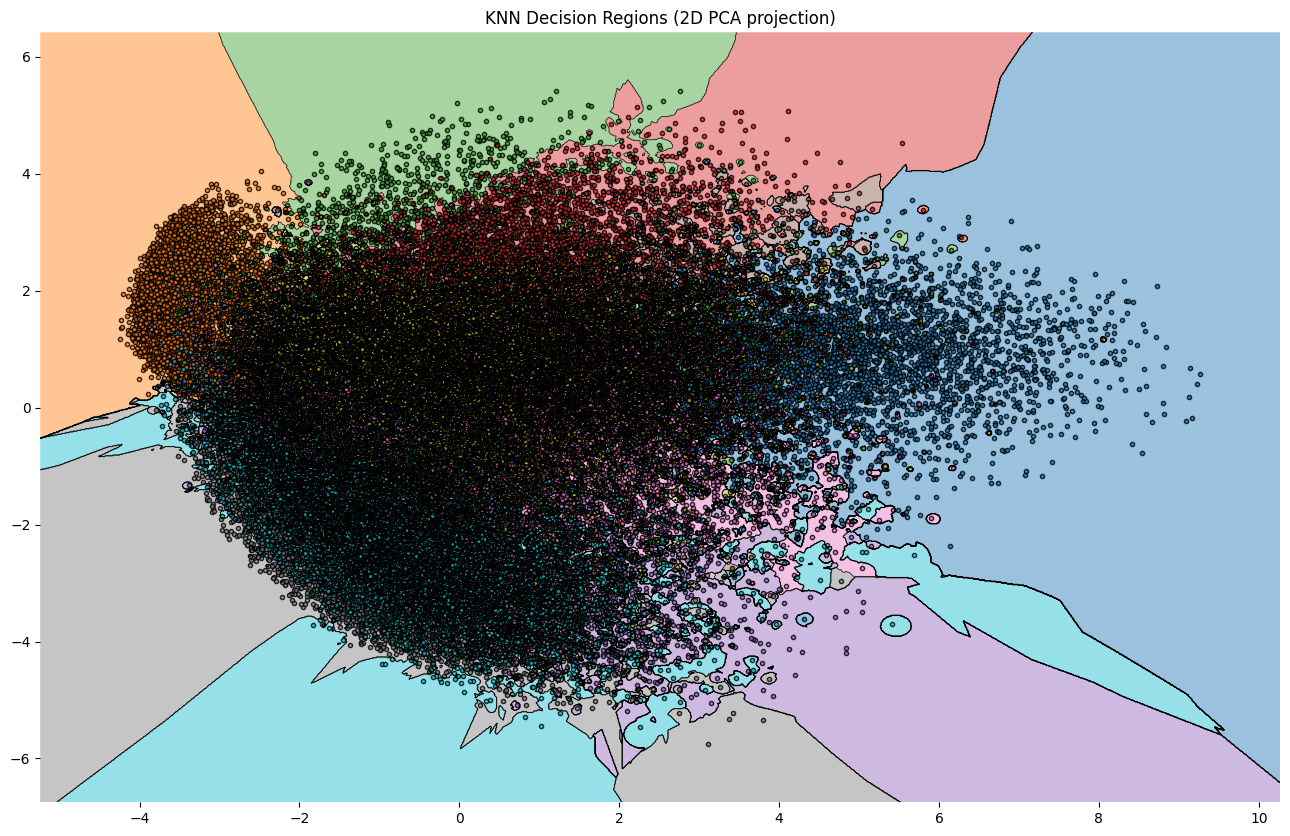

In [6]:
pca2 = PCA(n_components=2)
X_train_2d = pca2.fit_transform(x_train_scaled)

# Train a new KNN only for 2D plot
clf_2d = KNeighborsClassifier(n_neighbors=4, weights='distance')
clf_2d.fit(X_train_2d, y_train)

plt.figure(figsize=(16,10))
plot_decision_regions(X=X_train_2d, y=y_train, clf=clf_2d, markers='.', legend=0)
plt.title("KNN Decision Regions (2D PCA projection)")
plt.show()

## 7. PCA Explained Variance

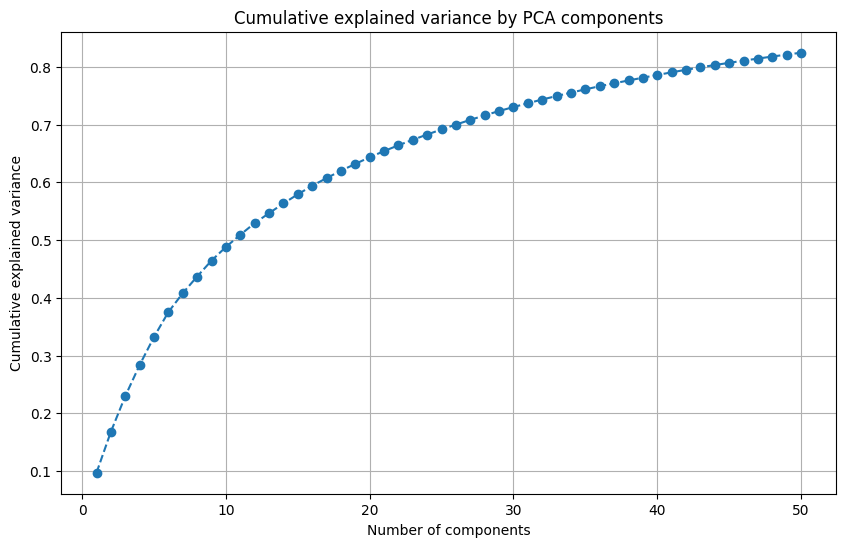

In [7]:
plt.figure(figsize=(10,6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_.cumsum(),
         marker='o', linestyle='--')
plt.title('Cumulative explained variance by PCA components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.grid(True)
plt.show()

## 8. Hyperparameter Tuning with GridSearchCV

In [8]:
parameters = {'n_neighbors':range(1,20),'weights':['uniform','distance']}

In [9]:
grid_cv = GridSearchCV(estimator=KNeighborsClassifier(),
                       param_grid=parameters,
                       scoring='accuracy')

In [10]:
grid_cv.fit(x_train,y_train)

,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': range(1, 20), 'weights': ['uniform', 'distance']}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,4


## 9. Model Evaluation

Best Parameters: {'n_neighbors': 4, 'weights': 'distance'}
Accuracy: 0.9767
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.96      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.97      0.97      0.97       892
           6       0.98      0.99      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.98      0.96      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



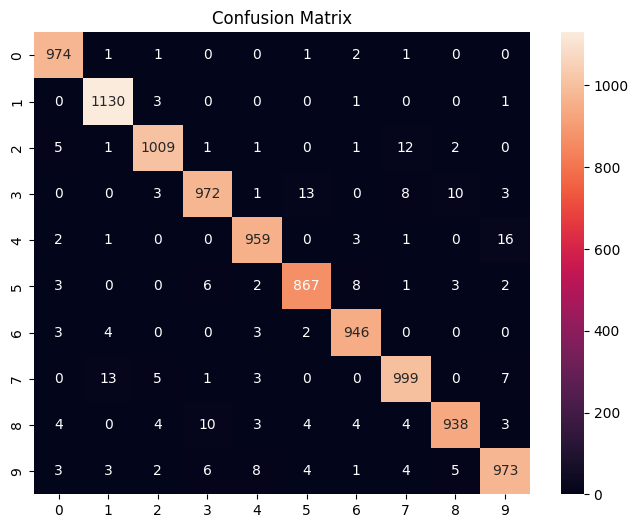

In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = grid_cv.predict(x_test)

print("Best Parameters:", grid_cv.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

### 10. Misclassified Digits

Number of misclassified digits: 233


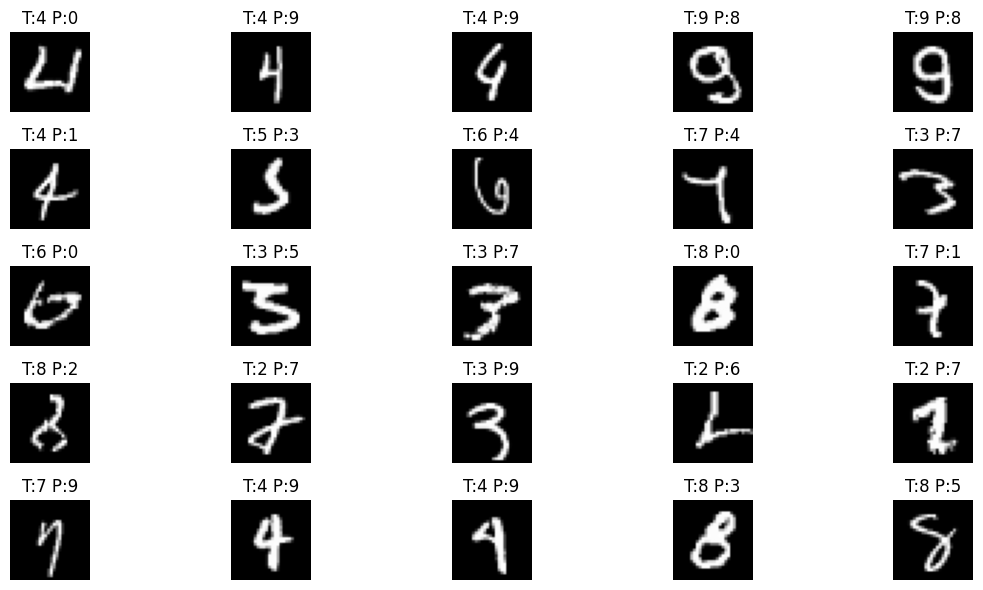

In [12]:
misclassified_idx = np.where(y_test != y_pred)[0]
print(f"Number of misclassified digits: {len(misclassified_idx)}")

plt.figure(figsize=(12, 6))

for i, idx in enumerate(misclassified_idx[:25]):  
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"T:{y_test[idx]} P:{y_pred[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()